#Atividade 04

In [14]:
import math
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def distancia_euclidiana(ponto1, ponto2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(ponto1[1:-1], ponto2[1:-1])))

In [ ]:
def knn(dados, novo_ponto, k):
    distancias = [(dados[i], distancia_euclidiana(dado, novo_ponto)) for i, dado in enumerate(dados)]
    distancias.sort(key=lambda x: x[1])  # Ordena as distâncias
    vizinhos = distancias[:k]  # Pega os k vizinhos mais próximos
    classes_vizinhos = [vizinho[0][-1] for vizinho in vizinhos]  # Obtém as classes dos vizinhos

    # Realiza a contagem das classes dos vizinhos e pega a classe mais comum
    contagem_classes = Counter(classes_vizinhos)
    classe_predita = contagem_classes.most_common(1)[0][0]

    return classe_predita

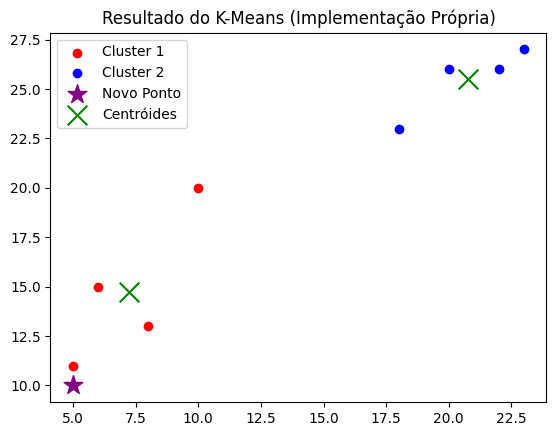

O ponto [5, 10] foi rotulado como Cluster 1.


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(dados, k, max_iter=100):
    # Inicializa os centróides aleatoriamente
    centroides = dados[np.random.choice(range(len(dados)), k, replace=False)]

    for _ in range(max_iter):
        # Atribui cada ponto ao cluster do centróide mais próximo
        rotulos = np.argmin(np.linalg.norm(dados - centroides[:, np.newaxis], axis=2), axis=0)

        # Atualiza os centróides como a média dos pontos em cada cluster
        centroides_novos = np.array([dados[rotulos == i].mean(axis=0) for i in range(k)])

        # Verifica a convergência
        if np.all(centroides == centroides_novos):
            break

        centroides = centroides_novos

    return rotulos, centroides

# Dados fornecidos
dados = np.array([
    [10, 20],
    [8, 13],
    [6, 15],
    [5, 11],
    [20, 26],
    [22, 26],
    [23, 27],
    [18, 23],
])

# Novo ponto a ser rotulado
novo_ponto = np.array([5, 10])

# Parâmetros do k-means
k = 2

# Aplicando o algoritmo k-means
rotulos, centroides = k_means(dados, k)

# Rotulando o novo ponto
rotulo_novo_ponto = np.argmin(np.linalg.norm(novo_ponto - centroides, axis=1)) + 1

# Plotando os dados e os centróides
cores = ['r', 'b']
for i in range(k):
    pontos_cluster = dados[rotulos == i]
    plt.scatter(pontos_cluster[:, 0], pontos_cluster[:, 1], c=cores[i], label=f'Cluster {i + 1}')

# Plotando o novo ponto a ser rotulado
plt.scatter(novo_ponto[0], novo_ponto[1], c='purple', marker='*', s=200, label='Novo Ponto')

plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=200, c='g', label='Centróides')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.title('Resultado do K-Means (Implementação Própria)')
plt.show()

print(f'O ponto [5, 10] foi rotulado como Cluster {rotulo_novo_ponto}.')
